# Feature Selection and Classification with and without Optimization

Written by: Hafiza Mehak Arif \
Date: 20-08-2025\
Email: mehakarif234@gmail.com


# Goal:

### The goal of this notebook is to specify the importance of feature selection.

### I've choice of using three techniques:

- **Filter method — SelectKBest with Chi-Square or ANOVA**
- **Wrapper method — Recursive Feature Elimination (RFE)**
- **Embedded method — Feature importance from Random Forest or Lasso Regression**

I'll be using RFE for my project as:

- **Doesn't select features on individual basis.**
- **Trains a model and assigns importance scores to each feature.**
- **Eliminates the least important feature(s).**
- **Repeats the process until only the desired number of features remain.**

So let's start building our notebook.


# Importing Essentials


In [19]:
# Importing essesntial modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### The dataset has wide amount of features if you want to explore the feature's details click here:

#### [Description](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/discussion/528138)


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


#### We can see that there are a lot's of features in our dataset which can be a big concern for our project. The presence of this much features can make the project complex as well as can lead to bad results. We will see the power of feature selection in this notebook further more.


# Exploratory Data Analysis


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.sample(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
70,859575,M,18.94,21.31,123.6,1130.0,0.09009,0.1029,0.108,0.07951,...,24.86,26.58,165.9,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589


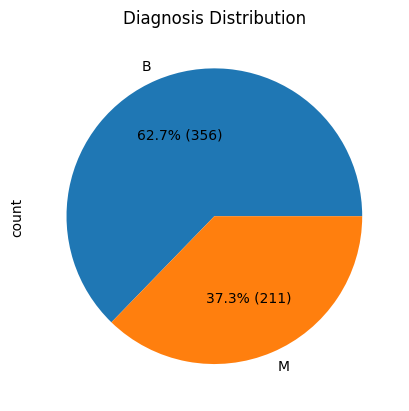

In [7]:
## We need to visualize the datadistribution in the target column.
counts = df['diagnosis'].value_counts()

counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}% ({int(p*sum(counts)/100)})',
    title="Diagnosis Distribution"
)

plt.show()

# There is a slight class imbalance in the dataset, here are some possible solutions:
# - WE can undersample and oversample the data but we will not implement these techniques here because the size of dataset is tiny.
# Instead we will use the default weight of balanced in the both algorithms.
# If the results are biased we will then use any of these techniques.

In [8]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
## Scaling Features to normalize the values

X = df.drop(columns=['id', 'diagnosis'])  # Dropping the target column
y = df['diagnosis']

In [10]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, for easier handling)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Spliting and Training Phase

**Now we will train test split our data as well as we will implement models on our data.**


In [11]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Training with Full Features


In [12]:
# Training without feature Selection
# Training Logistic Regression
lr_full = LogisticRegression()
lr_full.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Training Random Forest
rf_full = RandomForestClassifier()
rf_full.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation of Full Features Model


In [20]:
# Logistic Regression
y_pred_lr_full = lr_full.predict(X_test)
print("Logistic Regression (Full Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_full))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_full))

Logistic Regression (Full Features)
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           B       1.00      0.99      0.99        72
           M       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [21]:
# Random Forest
y_pred_rf_full = rf_full.predict(X_test)
print("\nRandom Forest (Full Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_full))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_full))


Random Forest (Full Features)
Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.93      0.94        72
           M       0.88      0.90      0.89        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



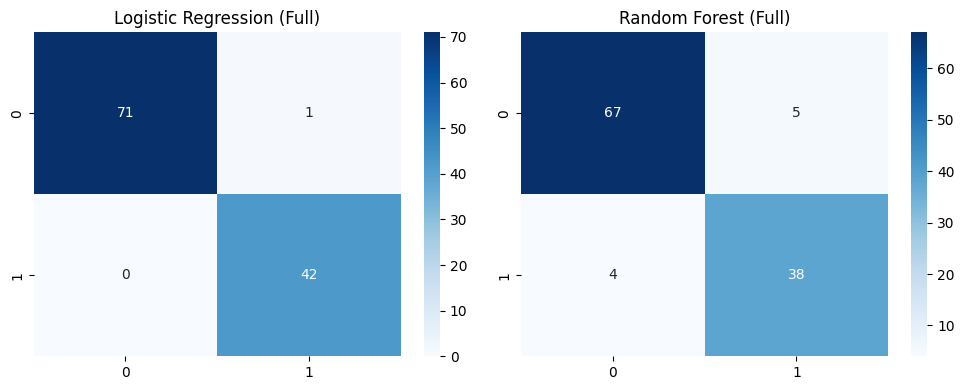

In [23]:
# Predictions without feature selection
y_pred_lr_full = lr_full.predict(X_test)
y_pred_rf_full = rf_full.predict(X_test)

# Confusion matrices
cm_lr_full = confusion_matrix(y_test, y_pred_lr_full)
cm_rf_full = confusion_matrix(y_test, y_pred_rf_full)

# Plotting CMatrix for LR with full features
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_lr_full, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression (Full)")

sns.heatmap(cm_rf_full, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest (Full)")

plt.tight_layout()
plt.show()

# Training with Recurrsive Feature Elimination


In [14]:
# RFE with Logistic Regression for feature selection
lr_rfe = LogisticRegression()
rfe = RFE(estimator=lr_rfe, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Getting selected features
selected_features = X.columns[rfe.support_].tolist()
print("Top 10 Features selected by RFE:")
print(selected_features)

# Creating new training and test sets with selected features
X_train_rfe = X_train.iloc[:, rfe.support_]
X_test_rfe = X_test.iloc[:, rfe.support_]

# Training Logistic Regression on RFE-selected features
lr_rfe_model = LogisticRegression()
lr_rfe_model.fit(X_train_rfe, y_train)

Top 10 Features selected by RFE:
['concave points_mean', 'radius_se', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


LogisticRegression()

In [15]:
# Train Random Forest on RFE-selected features

rf_rfe_model = RandomForestClassifier()
rf_rfe_model.fit(X_train_rfe, y_train)

RandomForestClassifier()

# Evaluation on RFE Models


In [24]:
# Logistic Regression
y_pred_lr_rfe = lr_rfe_model.predict(X_test_rfe)
print("Logistic Regression (RFE Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_rfe))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_rfe))

Logistic Regression (RFE Features)
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
# Random Forest
y_pred_rf_rfe = rf_rfe_model.predict(X_test_rfe)
print("\nRandom Forest (RFE Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rfe))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_rfe))


Random Forest (RFE Features)
Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.93      0.94        72
           M       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



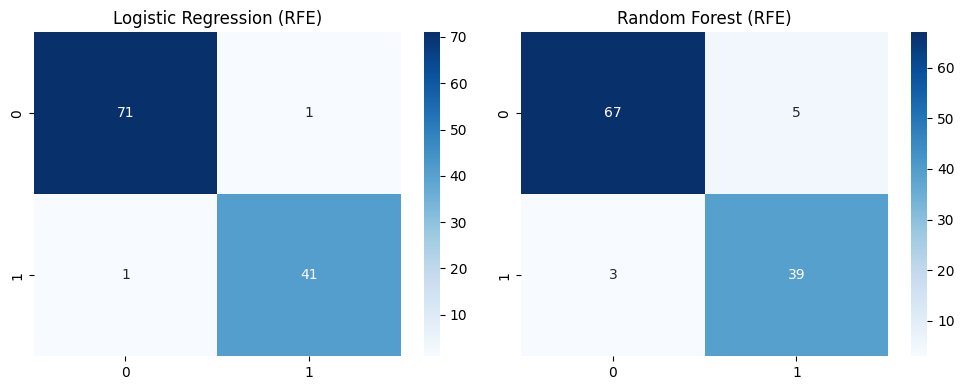

In [26]:
# Predictions with RFE feature selection
y_pred_lr_rfe = lr_rfe_model.predict(X_test_rfe)
y_pred_rf_rfe = rf_rfe_model.predict(X_test_rfe)

# Confusion matrices
cm_lr_rfe = confusion_matrix(y_test, y_pred_lr_rfe)
cm_rf_rfe = confusion_matrix(y_test, y_pred_rf_rfe)

# Plotting CMatrix for LR with RFE
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_lr_rfe, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression (RFE)")

# Plotting CMatrix for RF with RFE
sns.heatmap(cm_rf_rfe, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest (RFE)")
plt.tight_layout()
plt.show()

# Comparison of Accuracies Using Bar Plot


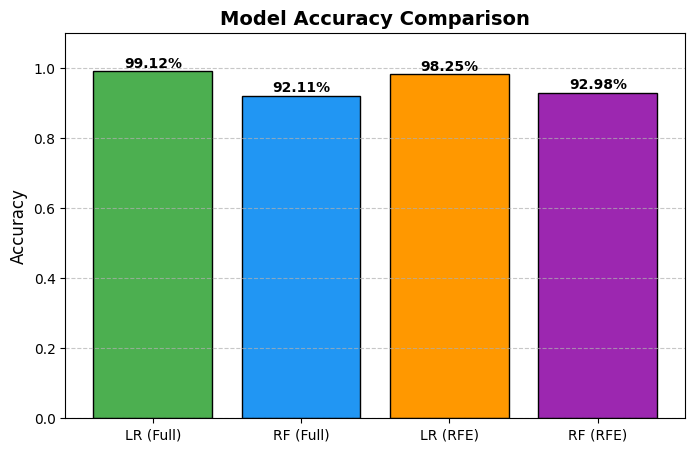

In [28]:
# Comparing Accuracies using Bar Plot
acc_lr_full = accuracy_score(y_test, lr_full.predict(X_test))
acc_rf_full = accuracy_score(y_test, rf_full.predict(X_test))
acc_lr_rfe = accuracy_score(y_test, lr_rfe_model.predict(X_test_rfe))
acc_rf_rfe = accuracy_score(y_test, rf_rfe_model.predict(X_test_rfe))

# Data
models = ["LR (Full)", "RF (Full)", "LR (RFE)", "RF (RFE)"]
accuracies = [acc_lr_full, acc_rf_full, acc_lr_rfe, acc_rf_rfe]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=["#4CAF50", "#2196F3", "#FF9800", "#9C27B0"], edgecolor="black")

# Labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc*100:.2f}%", ha='center', fontsize=10, fontweight="bold")

# Styling
plt.ylim(0,1.1)  # to make space for labels
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

### **We can see that there is not much difference between feature selection and no feature selection models.**


# Exporting Models


In [31]:
import joblib

# Logistic Regression (Full Features)
joblib.dump(lr_full, '/kaggle/working/logistic_regression_full_features.pkl')

# Random Forest (Full Features)
joblib.dump(rf_full, '/kaggle/working/random_forest_full_features.pkl')

# Logistic Regression (Selected Features)
joblib.dump(lr_rfe_model, '/kaggle/working/logistic_regression_selected_features.pkl')

# Random Forest (Selected Features)
joblib.dump(rf_rfe_model, '/kaggle/working/random_forest_selected_features.pkl')

['/kaggle/working/random_forest_selected_features.pkl']